## <center>  Mathematisch-algorithmische Grundlagen für Data Science
___

## Aufgabenblatt 9

&nbsp;

**Author:** &nbsp;Erik Autenrieth &nbsp;
**Author:** &nbsp;Minh Truong    &nbsp;

**Date:** &nbsp;&nbsp;&nbsp;&nbsp;  2021-06-01 16:08:02

___ 

In [1]:
import sys
import numpy as np
import numpy.linalg as la
import sympy as sym
from sympy import Matrix, symbols, linsolve,simplify
from sympy import *
from fractions import Fraction
sym.init_printing()
from IPython.display import display, Math

### Aufgabe 1 (Eigenwerte und Eigenvektoren)    

In [2]:
A = np.matrix('1 1 3; 1 5 1; 3 1 1')
B = np.matrix('1 0 0; 3 3 -4; -2 1 -2')

### (a) Berechnen Sie Eigenwerte und Eigenvektoren der folgenden Matrizen:

In [4]:
P_A = np.poly(A)      # Die Funktion numpy.poly() liefert die Koeffizienten des charakteristischen Polynoms:
P_B = np.poly(B)

ew_A = np.roots(P_A)  # numpy.roots(p) liefert die Nullstellen eines Polynoms mit Koeffizienten die in p:
ew_B = np.roots(P_B)

EWA,EVA = la.eig(A)     # Routine aus numpy.linalg zur Berechnung des Eigenwertproblems
EWB,EVB = la.eig(B)  


display(Math(' \\text{Eigenwerte A =  } %s' % (sym.latex(sym.simplify(Matrix(EWA.astype(int)))))))
display(Math(' \\text{Eigenwerte B =} %s' % (sym.latex(sym.simplify(Matrix(EWB.astype(int)))))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
for i in range(3):
    display(Math(' \\text{Eigenvektor A =  } %s' %(sym.latex(sym.simplify(Matrix(np.matrix.round(EVA[:,i]).
                                                                                 astype(int)))))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### (b) Geben Sie für A eine orthogonale Matrix Q und eine Diagonalmatrix D an

In [44]:
Q   =  EVA              # Q ist eine Matrix aus den normierten Eigenvektoren 
QT  =  np.transpose(Q)  
D   =  np.diag(EWA)     # D trägt die Eigenwerte auf der Hauptdiagonalen 
rat = Q
rat = np.array(rat)
Q_frac=[]

for z in range(len(rat[0])):
    Q_frac.append(list(map(lambda x: Rational(x).limit_denominator(10), rat[z])))

Q_frac = np.array(Q_frac)
Q_tr =np.transpose(Q_frac)

display(Math(' \\text{Q = } %s\n' % (sym.latex(sym.simplify(Matrix(Q_frac))))))
display(Math(' \\text{QT = } %s\n' % (sym.latex(sym.simplify(Matrix(Q_tr))))))
display(Math(' \\text{D = } %s\n' % (sym.latex(sym.simplify(Matrix(D))))))
display(Math(' \\text{Q*D*QT = } %s \\text{ = A}\n' % (sym.latex(sym.simplify(Matrix(np.around(Q@D@QT))))))) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [45]:
def A_n(A:[float, float]=None, p:[float]=None , n:int=None)-> [float]: 
    """
    input values: Matrix, Point, n
    This funktion works just for 3x3 matrices.
    return: 
    """
    if (len(A)!=3): sys.exit('Sry just 3x3 matrices')
    
    a,b,c,N = symbols('a b c N')
    EW,EV = la.eig(A) 
    E = list(linsolve( (Matrix(EV), Matrix(p)), [a, b, c] ))[0]
    a, b, c = E
    l = []
    for i,par in enumerate([a,b,c]):
        l.append(par*pow(EW[i],n)*EV[:,i])
    return sum(l)
    
    
probe = A_n(A=A, n=2, p=[1,5,1])
display(Math(' \\text{An  p(1,5,1) = } %s' % (sym.latex(sym.simplify(Matrix(probe))))))
# Matrix(A@A@np.array([1,5,1]))    # Die Probe zeigt, dass die Funktion korrekt ist 

<IPython.core.display.Math object>

In [46]:
def matrix_rational(M=None):
    M=np.array(M)
    n = len(M[0])
    M_frac = []
    for z in range(n):
        M_frac.append(list(map(lambda x: Rational(x).limit_denominator(10),rat[z])))
    return np.array(M_frac)

### Aufgabe 2 (Diskreter Wachstumsprozess)

$$a_{n}= 3a_{n-1}+4a_{n-2}-12a_{n-3} $$    
$$n \geq 3$$
$$a_{0}= 0, a_{1} = 1, a_{2} = 2.  $$

In [47]:
def wachstum_rek(n:int=None)->int:
    if n==0:   return 0
    elif n==1: return 1
    elif n==2: return 2
    else:
        return 3*wachstum_rek(n-1) + 4*wachstum_rek(n-2) - 12*wachstum_rek(n-3)
print('Funcion values :')
for i in range(10):    
    print(wachstum_rek(i),' ', end = '')

Funcion values :
0  1  2  10  26  94  266  862  2522  7822  

### (a) Geben Sie eine Matrix B an, die den Wachstumsprozess beschreibt.

$$
\begin{pmatrix}
a_{n} \\
a_{n-1} \\
a_{n-2} 
\end{pmatrix}
=
\begin{pmatrix}
3 & 4 & -12 \\
1 & 0 & 0 \\
0 & 1 & 0  
\end{pmatrix}
\begin{pmatrix}
a_{n-1} \\
a_{n-2} \\
a_{n-3} 
\end{pmatrix}
$$


$$
\mathbf{B}
=
\begin{pmatrix}
3 & 4 & -12 \\
1 & 0 & 0 \\
0 & 1 & 0  
\end{pmatrix}^{n-1}
\begin{pmatrix}
f_{2} \\
f_{1}\\
f_{0}
\end{pmatrix}
$$

In [48]:
B = np.array([[3, 4, -12],
              [1, 0, 0], 
              [0, 1, 0]])

start = np.array([2, 1, 0])

EW,EV = la.eig(B)

### (b) Berechnen Sie die Eigenwerte und Eigenvektoren von B.

In [49]:
EV = matrix_rational(EV)
l = []
for i in range(3):
    l.append(EV[:,i])
    
display(Math(' \\text{EW B =  } %s' % (sym.latex(sym.simplify(Matrix(EW))))))
for i in range(3):
    l.append(EV[:,i])
    display(Math(' \\text{EV B =  } %s' %(sym.latex((Matrix(EV[:,i]))))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### (c) Stellen Sie den Anfangsvektor als Linearkombination von Eigenvektoren dar.

In [50]:
r, s, t = symbols('r s t')
E = list(linsolve( (Matrix(EV), Matrix(start)), [r, s, t] ))[0]

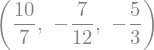

In [51]:
E

In [53]:
a=sym.latex(Matrix(l[0]))
b=sym.latex(Matrix(l[1]))
c=sym.latex(Matrix(l[2]))
s = sym.latex(sym.simplify(Fraction(str(E[0])).limit_denominator(10)))
t=sym.latex(sym.simplify(Fraction(str(E[1])).limit_denominator(10)))
u=sym.latex(sym.simplify(Fraction(str(E[2])).limit_denominator(10)))
y= sym.latex(sym.simplify(Matrix(start)))

In [54]:
display(Math('%s  %s a+ %s %s a + %s %s a = %s' %(s,a,t,b,u,c,y)   ))

<IPython.core.display.Math object>

### (d) Explizite Formel

In [43]:
a_n = lambda n: 1/4 * (-(3/5)*((-2)**n)-(2**n)) + ((2/5)*(3**n))

print('Funcion values Rekursiv:')
for i in range(10):    
    print(wachstum_rek(i),' ', end = '')
print()
print('Funcion values Explicit:')
for i in range(10):    
    print(round(a_n(i)),' ', end = '')

Funcion values Rekursiv:
0  1  2  10  26  94  266  862  2522  7822  
Funcion values Explicit:
0  1  2  10  26  94  266  862  2522  7822  